Hitesh                                                  \
Enrollment Number: A023119820027                        \
Programme: B.Tech AI                                    \
Branch: Artificial Intelligence                         \
Batch: 2020 - 2024                                      \
Semester: 7                                             \
Section: 7AI 1                                          \
Email id: hiteshb3004@gmail.com                         \
Phone Number: 9873315702

#TSA LAB 3: Seasonal Decomposition, Stationairy Test, ADF Test - Air Passengers Dataset

##**Load Time Series Dataset**
We'll now explore trend and seasonality removal with examples. We'll be using famous air passenger datasets available on-line for our purpose because it has both trend and seasonality. It has information about US airline passengers from 1949 to 1960 recorded each month. Please download the dataset to follow along.

*Air Passengers Dataset

In [ ]:
# import pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
air_passengers= pd.read_csv("/content/AirPassengers (1).csv", index_col = 0, parse_dates= True)# read the data using pandas include (index_col=0, parse_dates=True)

air_passengers.rename(columns = {"#Passengers":"Passengers"}, inplace=True)
air_passengers.head()# preview data using head command


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
print(air_passengers.index.freq)

None


<Axes: xlabel='Month'>

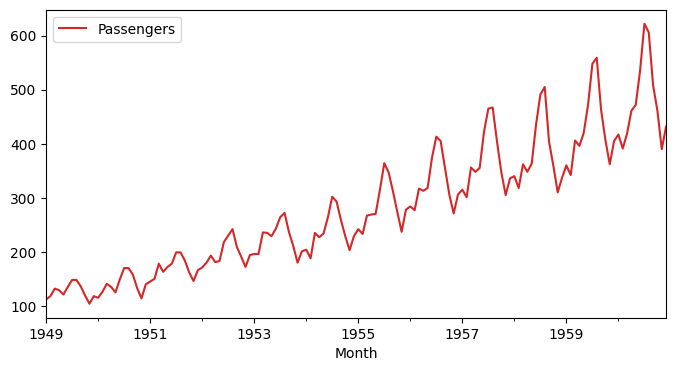

In [ ]:
air_passengers.plot(figsize=(8,4), color="tab:red")

<ipython-input-173-f5127d2b8eca>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  air_passengers["1952"].plot(kind="bar", color="tab:green", legend=False);


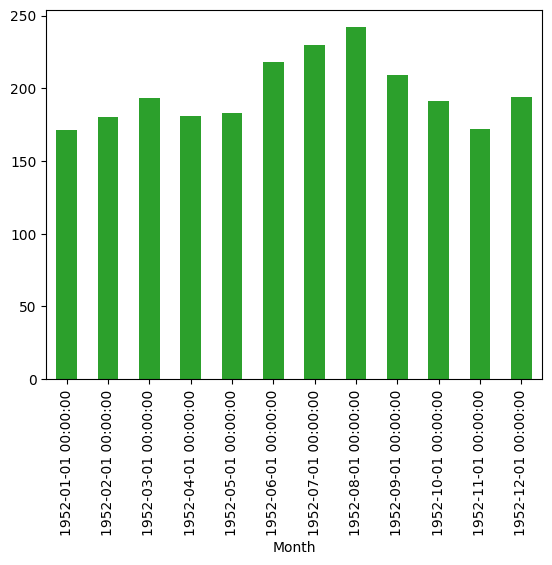

In [ ]:
air_passengers["1952"].plot(kind="bar", color="tab:green", legend=False);

By looking at the above plots we can see that our time-series is multiplicative time-series and has both trend as well as seasonality. We can see the trend as passengers are constantly increasing over time. We can see seasonality with the same variations repeating for 1 year where value peaks somewhere are around August.

**Decompose Time-Series to See Components (Trend, Seasonality, Noise, etc)**

We can decompose time-series to see various components of time-series. Python module named statmodels provides us with easy to use utility which we can use to get an individual component of time-series and then visualize it.

In [ ]:
#import seasonal decomposing using statsmodel and seasonal decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

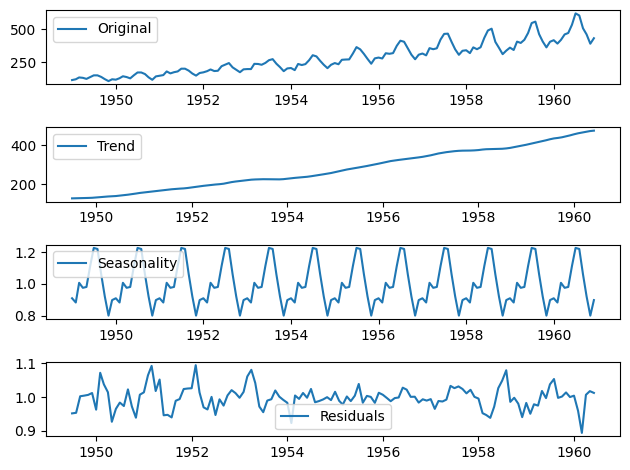

In [ ]:
decompose_result = seasonal_decompose(air_passengers, model='multiplicative', filt=None, period=None, two_sided=True, extrapolate_trend=0)

 # perform seasonal decomposing using multiplicative model type

trend = decompose_result.trend # get trend
seasonal = decompose_result.seasonal #get seasonal
residual = decompose_result.resid #get residual

#plot the decompose result
# decompose_result.plot("Multiplicative Decomposition")

plt.subplot(411)
plt.plot(air_passengers, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

We can notice trend and seasonality components separately as well as residual components. There is a loss of residual in the beginning which is settling later.



**Checking Whether Time-Series is Stationary or Not**

As we declared above time-series is stationary whose mean, variance and auto-covariance are independent of time. We can check mean, variance and auto-covariance using moving window functions available with pandas. We'll also use a dicky-fuller test available with statsmodels to check the stationarity of time-series. If time-series is not stationary then we need to make it stationary.

Below we have taken an average over moving window of 12 samples. We noticed from the above plots that there is the seasonality of 12 months in time-series. We can try different window sizes for testing purposes.

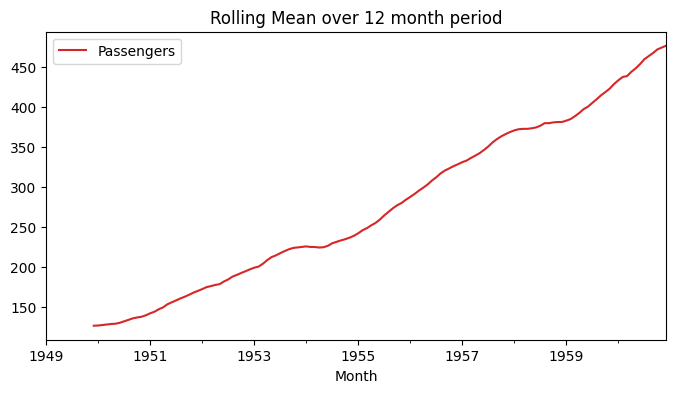

In [ ]:
air_passengers.rolling(window = 12).mean().plot(figsize=(8,4), color="tab:red", title="Rolling Mean over 12 month period");

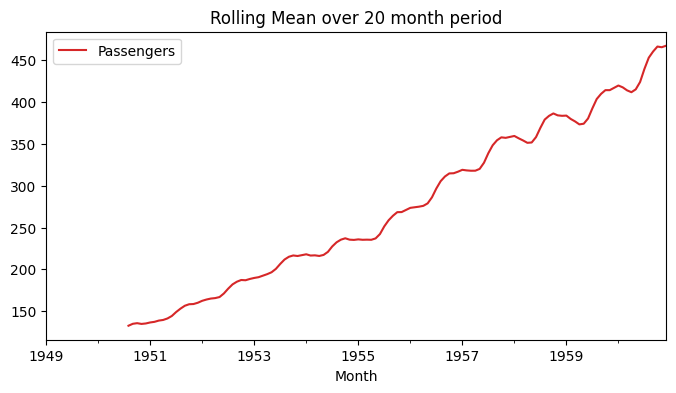

In [ ]:
#same as above apply the rolling mean for 20 month period
air_passengers.rolling(window = 20).mean().plot(figsize=(8,4), color="tab:red", title="Rolling Mean over 20 month period");

We can clearly see that time-series has a visible upward trend.

Below we have taken variance over the moving window of 12 samples. We noticed from the above plots that there is the seasonality of 12 months in time-series

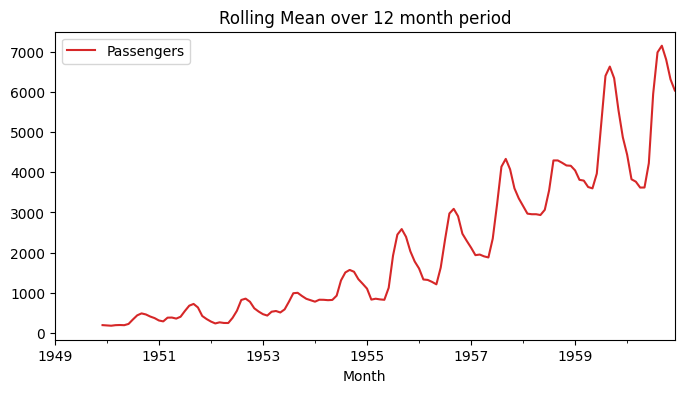

In [ ]:
# same as above instead of rolling mean now calculate the variance for 12 months
air_passengers.rolling(window = 12).var().plot(figsize=(8,4), color="tab:red", title="Rolling Mean over 12 month period");

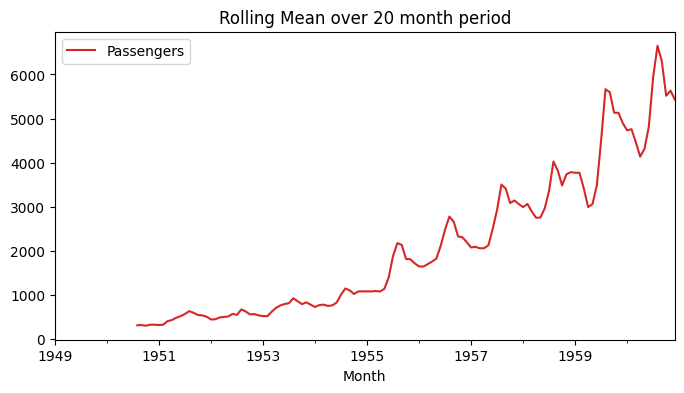

In [ ]:
# same as above instead of rolling mean now calculate the variance for 20 months
air_passengers.rolling(window = 20).var().plot(figsize=(8,4), color="tab:red", title="Rolling Mean over 20 month period");

From the above two plots, we notice that time series has some kind of multiplicative effect which seems to be increasing with time period. We can see the low seasonality effect at the beginning which amplifies over time.

Below we are also plotting an auto-correlation plot for time-series data as well. This plot helps us understand whether present values of time series are positively correlated, negatively correlated, or not related at all to past values. statsmodels library provides ready to use method plot_acf as a part of module statsmodels.graphics.tsaplots.

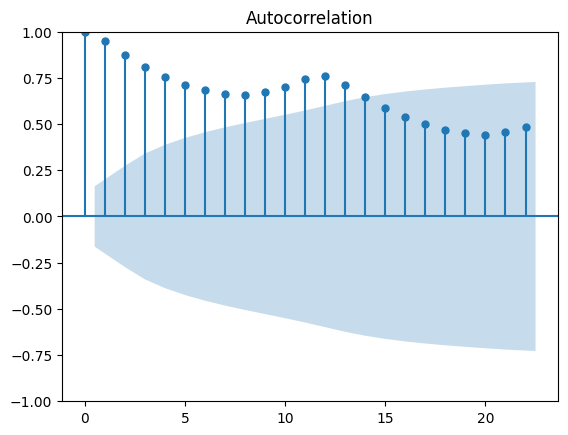

In [ ]:
#using from statsmodels.graphics.tsaplots import the autocorrelation function (plot_acf )
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(air_passengers);

We can notice from the above chart that after 13 lags, the line gets inside confidence interval (light blue area). This can be due to seasonality of 12-13 months in our data.

**Dicky-Fuller Test for Stationarity**
Once we have removed trend and seasonality from time-series data then we can test its stationarity using a dicky-fuller test. It's a statistical test to check the stationarity of time-series data.

Further Read About Test

We can perform Dicky-Fuller test functionality available with the statsmodels library.

Below we'll test the stationarity of our time-series with this functionality and try to interpret its results to better understand it.

In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(air_passengers['Passengers'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  0.8153688792060498
2. P-Value :  0.991880243437641
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


We can interpret above results based on p-values of result.

p-value > 0.05 - This implies that time-series is non-stationary.
p-value <=0.05 - This implies that time-series is stationary.
We can see from the above results that p-value is greater than 0.05 hence our time-series is not stationary. It still has time-dependent components present which we need to remove.

**Remove Trend**
There are various ways to remove trends from data as we have discussed above. We'll try ways like differencing, power transformation, log transformation, etc.

**Logged Transformation**

To apply log transformation, we need to take a log of each individual value of time-series data.


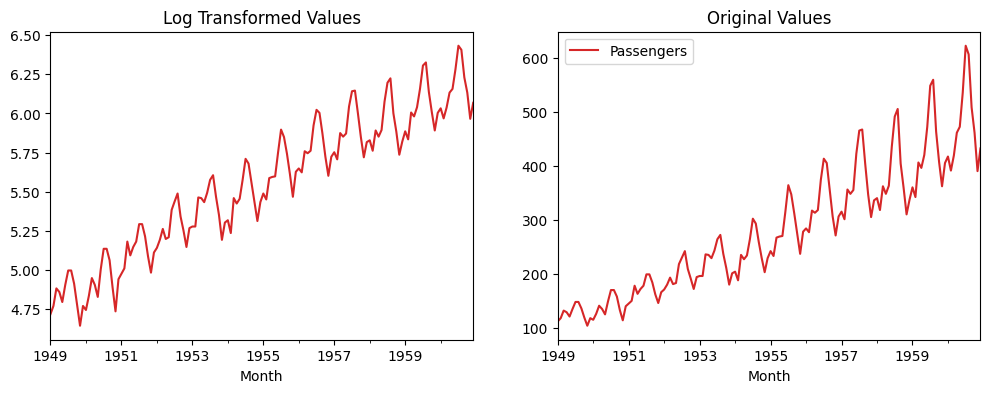

In [ ]:
logged_passengers = air_passengers["Passengers"].apply(lambda x : np.log(x))

ax1 = plt.subplot(121)
logged_passengers.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(color="tab:red", title="Original Values", ax=ax2);

From the above first chart, we can see that we have reduced the variance of time-series data. We can look at y-values of original time-series data and log-transformed time-series data to conclude that the variance of time-series is reduced.

We can check whether we are successful or not by checking individual components of time-series by decomposing it as we had done above.

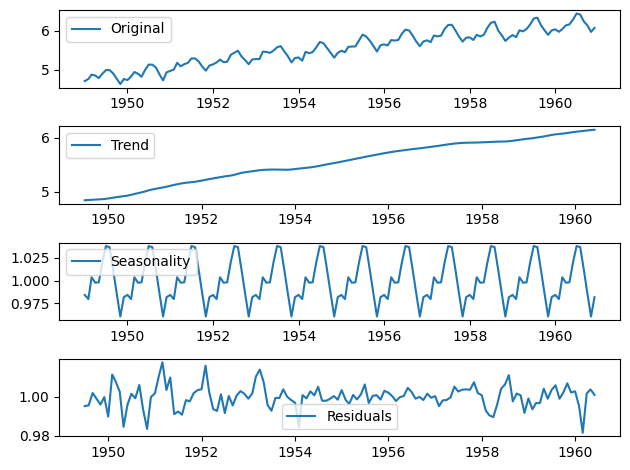

In [ ]:
# perform seasonal decompose on logged transformed
decompose_result = seasonal_decompose(logged_passengers, model='multiplicative', filt=None, period=None, two_sided=True, extrapolate_trend=0)

# perform seasonal decomposing using multiplicative model type

trend = decompose_result.trend # get trend
seasonal = decompose_result.seasonal #get seasonal
residual = decompose_result.resid #get residual

#plot the decompose result
# decompose_result.plot("Multiplicative Decomposition")

plt.subplot(411)
plt.plot(logged_passengers, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**Power Transformations**
We can apply power transformation in data same way as that of log transformation to remove trend.

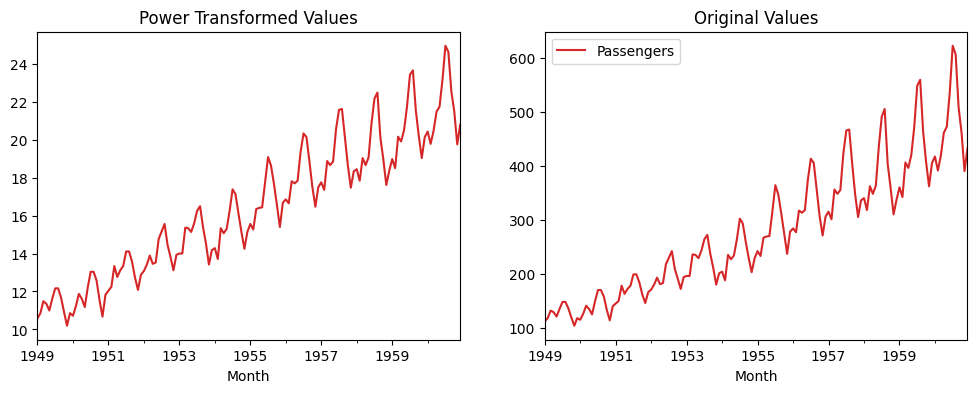

In [ ]:
# perform power transform using (lambda x : x ** 0.5)

power_passengers = air_passengers["Passengers"].apply(lambda x : x ** 0.5)


# plot the curve for the same

ax1 = plt.subplot(121)
power_passengers.plot(figsize=(12,4) ,color="tab:red", title="Power Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(color="tab:red", title="Original Values", ax=ax2);

From the above first chart, we can see that we have reduced the variance of time-series data. We can look at y-values of original time-series data and power-transformed time-series data to conclude that the variance of time-series is reduced.

We can check whether we are successful or not by checking individual components of time-series by decomposing it as we had done above.

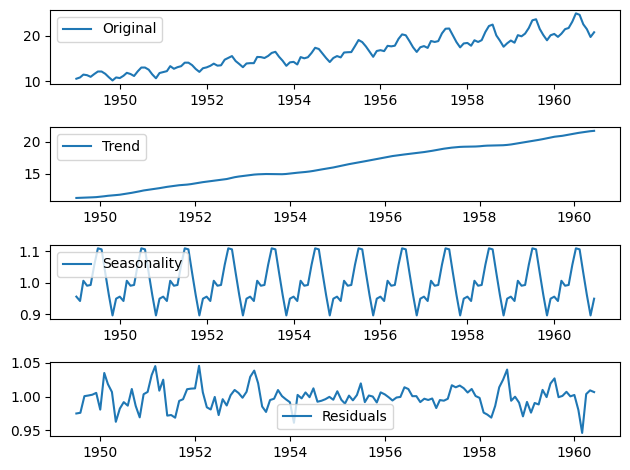

In [ ]:
# perform seasonal decompose on power transformed
decompose_result = seasonal_decompose(power_passengers, model='multiplicative', filt=None, period=None, two_sided=True, extrapolate_trend=0)

 # perform seasonal decomposing using multiplicative model type

trend = decompose_result.trend # get trend
seasonal = decompose_result.seasonal #get seasonal
residual = decompose_result.resid #get residual

#plot the decompose result
# decompose_result.plot("Multiplicative Decomposition")

plt.subplot(411)
plt.plot(power_passengers, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**Applying Moving Window Functions**
We can calculate rolling mean over a period of 12 months and subtract it from original time-series to get de-trended time-series.

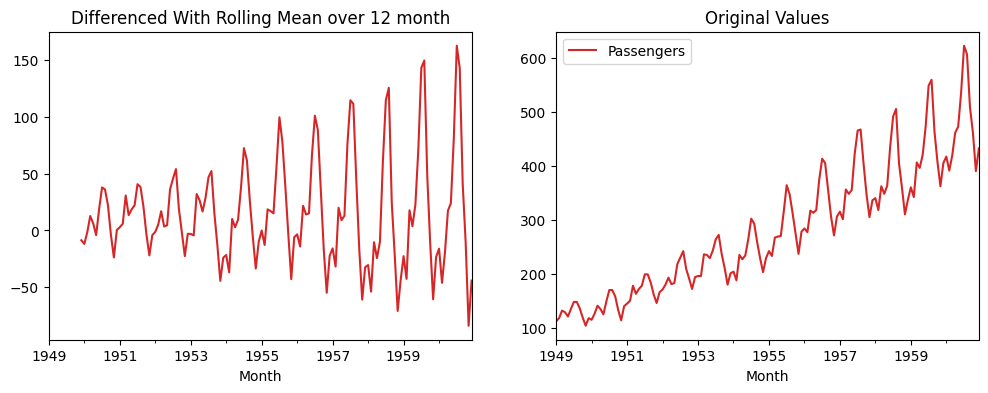

In [ ]:
rolling_mean = air_passengers.rolling(window = 12).mean()
passengers_rolled_detrended = air_passengers['Passengers'] - rolling_mean['Passengers']


ax1 = plt.subplot(121)
passengers_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

From the above the first chart, we can see that we seem to have removed trend from time-series data.

We can check whether we are successful or not by checking individual components of time-series by decomposing it as we had done above.

In [ ]:
passengers_rolled_detrended

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    142.666667
1960-09-01     40.916667
1960-10-01    -10.583333
1960-11-01    -83.916667
1960-12-01    -44.166667
Name: Passengers, Length: 144, dtype: float64

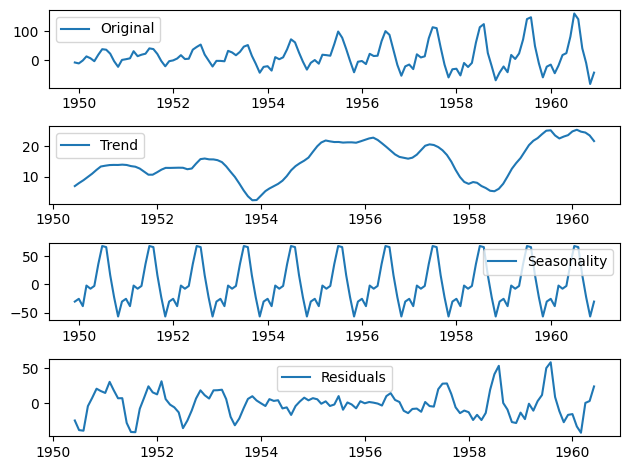

In [ ]:
# perform seasonal decompose on logged transformed

decompose_result = seasonal_decompose(passengers_rolled_detrended.dropna(), model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)

# perform seasonal decomposing using additive model type

trend = decompose_result.trend # get trend
seasonal = decompose_result.seasonal #get seasonal
residual = decompose_result.resid #get residual

#plot the decompose result
# decompose_result.plot("Multiplicative Decomposition")

plt.subplot(411)
plt.plot(passengers_rolled_detrended, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**Applying Moving Window Function on Log Transformed Time-Series**

We can apply more than one transformation as well. We'll first apply log transformation to time-series, then take a rolling mean over a period of 12 months and then subtract rolled time-series from log-transformed time-series to get final time-series.

In [ ]:
logged_passengers

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Passengers, Length: 144, dtype: float64

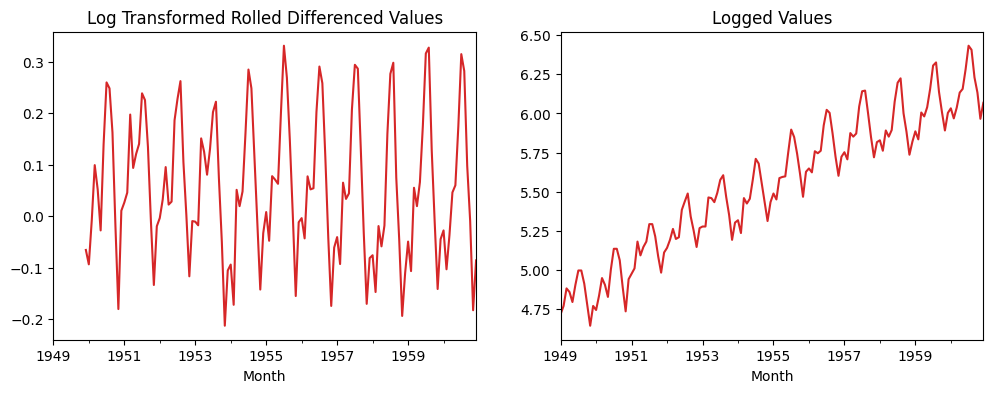

In [ ]:
# take log transformed and rolling mean for 12 months period time
rolling_mean = logged_passengers.rolling(window = 12).mean()
passengers_log_rolled_detrended = logged_passengers - rolling_mean


# plot the passengers_log_rolled_detrended
ax1 = plt.subplot(121)
passengers_log_rolled_detrended.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Rolled Differenced Values", ax=ax1);
ax2 = plt.subplot(122)
logged_passengers.plot(color="tab:red", title="Logged Values", ax=ax2);

From the above the first chart, we can see that we are able to removed the trend from time-series data.

We can check whether we are successful or not by checking individual components of time-series by decomposing it as we had done above.

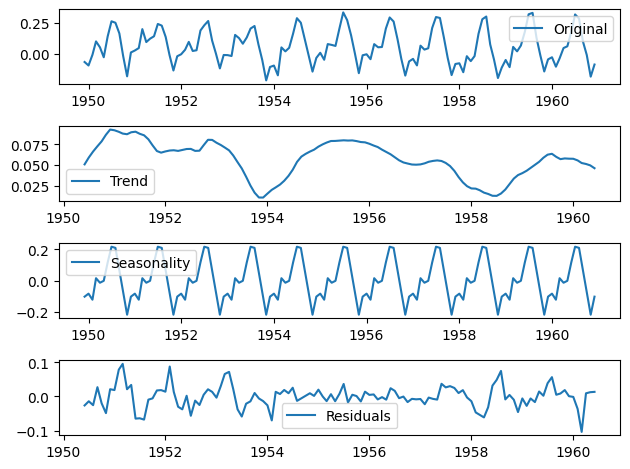

In [ ]:
# perform seasonal decompose on logged transformed

decompose_result = seasonal_decompose(passengers_log_rolled_detrended.dropna(), model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)

# perform seasonal decomposing using additive model type

trend = decompose_result.trend # get trend
seasonal = decompose_result.seasonal #get seasonal
residual = decompose_result.resid #get residual

#plot the decompose result
# decompose_result.plot("Multiplicative Decomposition")

plt.subplot(411)
plt.plot(passengers_log_rolled_detrended, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**Applying Moving Window Function on Power Transformed Time-Series**

We can apply more than one transformation as well. We'll first apply power transformation to time-series, then take a rolling mean over a period of 12 months and then subtract rolled time-series from power-transformed time-series to get final time-series.

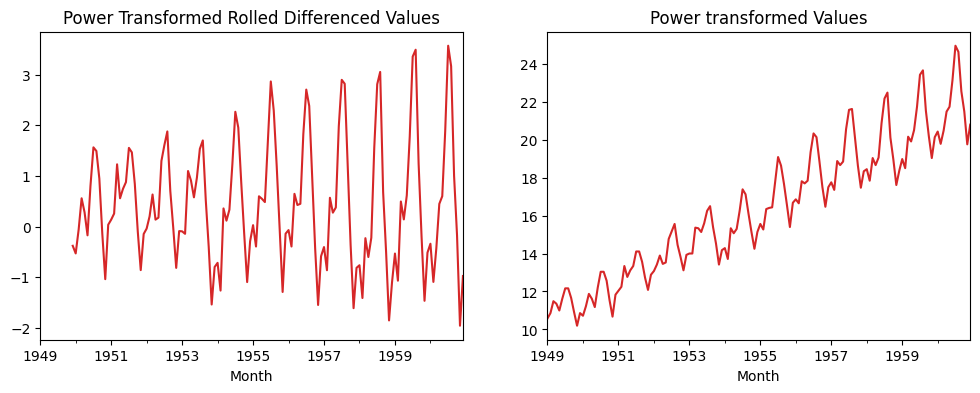

In [ ]:
rolling_mean = power_passengers.rolling(window = 12).mean()
passengers_pow_rolled_detrended = power_passengers - rolling_mean  # take the difference of power transformed and rolling mean on powered transformed

# plot the passengers_log_rolled_detrended
ax1 = plt.subplot(121)
passengers_pow_rolled_detrended.plot(figsize=(12,4) ,color="tab:red", title="Power Transformed Rolled Differenced Values", ax=ax1);
ax2 = plt.subplot(122)
power_passengers.plot(color="tab:red", title="Power transformed Values", ax=ax2);

From the above the first chart, we can see that we are able to remove the trend from time-series data.

We can check whether we are successful or not by checking individual components of time-series by decomposing it as we had done above.

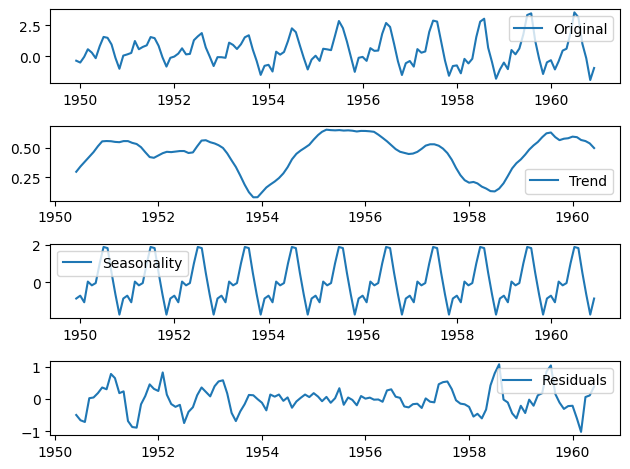

In [ ]:
# perform seasonal decompose on logged transformed

decompose_result = seasonal_decompose(passengers_pow_rolled_detrended.dropna(), model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)

# perform seasonal decomposing using additive model type

trend = decompose_result.trend # get trend
seasonal = decompose_result.seasonal #get seasonal
residual = decompose_result.resid #get residual

#plot the decompose result
# decompose_result.plot("Multiplicative Decomposition")

plt.subplot(411)
plt.plot(passengers_pow_rolled_detrended, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**Applying Linear Regression to Remove Trend**

We can also apply a linear regression model to remove the trend. Below we are fitting a linear regression model to our time-series data. We are then using a fit model to predict time-series values from beginning to end. We are then subtracting predicted values from original time-series to remove the trend.

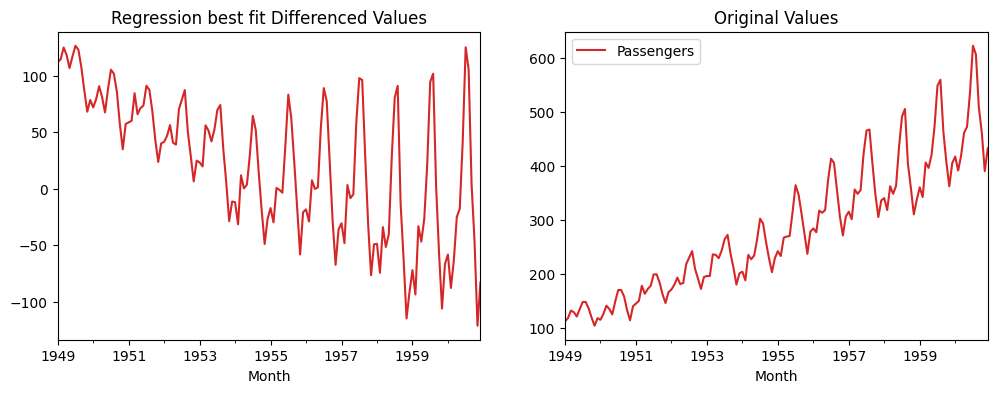

In [ ]:
from statsmodels.regression.linear_model import OLS

least_squares = OLS(air_passengers["Passengers"].values, list(range(air_passengers.shape[0])))
result = least_squares.fit()

fit = pd.Series(result.predict(list(range(air_passengers.shape[0]))), index = air_passengers.index)

passengers_ols_detrended = air_passengers["Passengers"] - fit


# plot the reggressed model
ax1 = plt.subplot(121)
passengers_ols_detrended.plot(figsize=(12,4) ,color="tab:red", title="Regression best fit Differenced Values", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(color="tab:red", title="Original Values", ax=ax2);

From the above the first chart, we can see that we are able to remove the trend from time-series data.

We can check whether we are successful or not by checking individual components of time-series by decomposing it as we had done above.

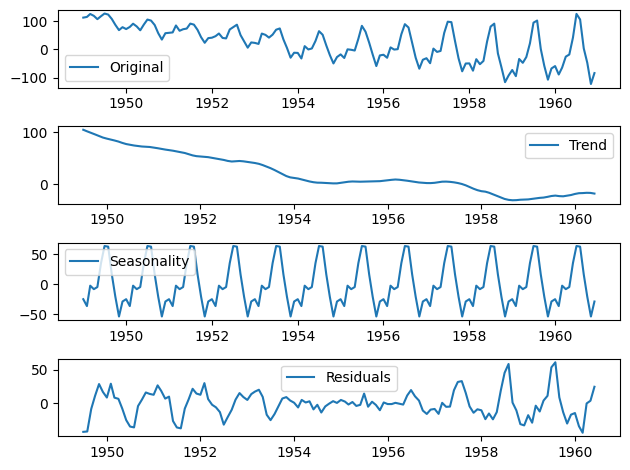

In [ ]:
# perform seasonal decompose on logged transformed

decompose_result = seasonal_decompose(passengers_ols_detrended, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)

# perform seasonal decomposing using additive model type

trend = decompose_result.trend # get trend
seasonal = decompose_result.seasonal #get seasonal
residual = decompose_result.resid #get residual

#plot the decompose result
# decompose_result.plot("Multiplicative Decomposition")

plt.subplot(411)
plt.plot(passengers_ols_detrended, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

After applying the above transformations, we can say that linear regression seems to have done a good job of removing the trend than other methods. We can confirm it further whether it actually did good by removing the seasonal component and checking stationarity of time-series.

**Remove Seasonality**
We can remove seasonality by differencing technique. We'll use differencing over various de-trended time-series calculated above.

**Differencing Over Log Transformed Time-Series**
We have applied differencing to log-transformed time-series by shifting its value by 1 period and subtracting it from original log-transformed time-series

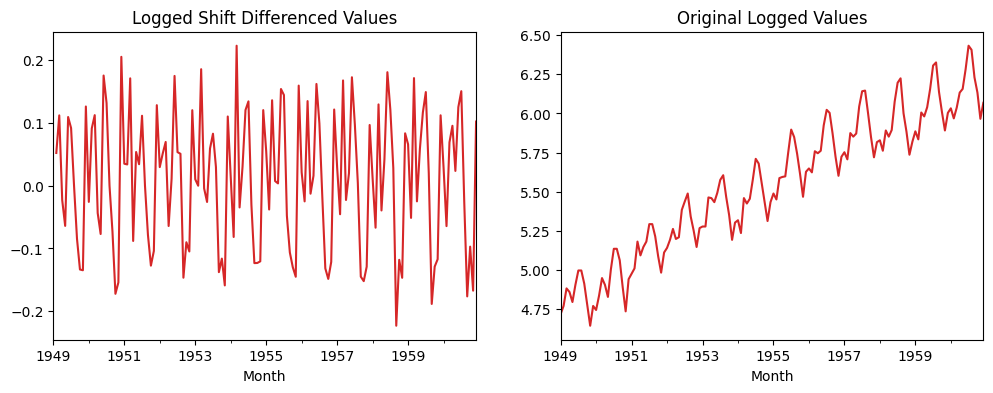

In [ ]:
logged_passengers_diff = logged_passengers - logged_passengers.shift()

# plot the logged_passengers_diff
ax1 = plt.subplot(121)
logged_passengers_diff.plot(figsize=(12,4) ,color="tab:red", title="Logged Shift Differenced Values", ax=ax1);
ax2 = plt.subplot(122)
logged_passengers.plot(color="tab:red", title="Original Logged Values", ax=ax2);

We can now test whether our time-series is stationary of now by applying the dicky-fuller test which we had applied above.

In [ ]:
# perform the ADF test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(logged_passengers_diff.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.717130598388114
2. P-Value :  0.07112054815086184
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 128
5. Critical Values :
	 1% :  -3.4825006939887997
	 5% :  -2.884397984161377
	 10% :  -2.578960197753906


From our dicky-fuller test results, we can confirm that time-series is NOT STATIONARY due to the p-value of 0.07 greater than 0.05.

**Differencing Over Power Transformed Time-Series**

We have applied differencing to power transformed time-series by shifting its value by 1 period and subtracting it from original power transformed time-series

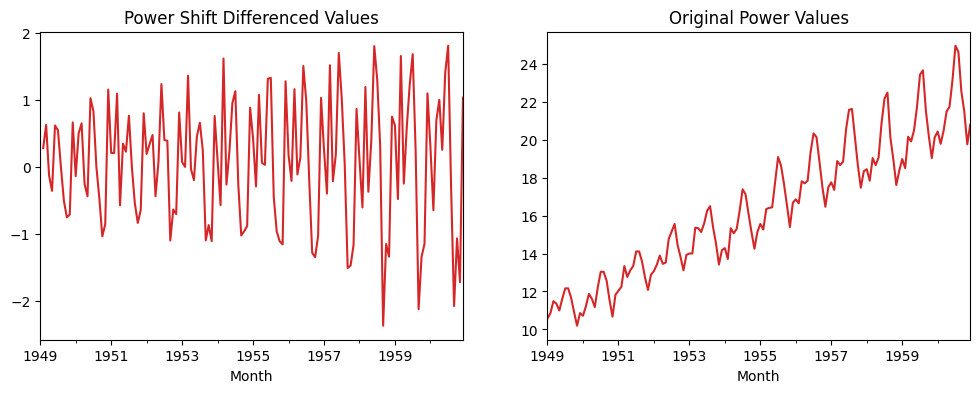

In [ ]:
powered_passengers_diff = power_passengers - power_passengers.shift()

# plot the logged_passengers_diff
ax1 = plt.subplot(121)
powered_passengers_diff.plot(figsize=(12,4) ,color="tab:red", title="Power Shift Differenced Values", ax=ax1);
ax2 = plt.subplot(122)
power_passengers.plot(color="tab:red", title="Original Power Values", ax=ax2);

We can now test whether our time-series is stationary of now by applying the dicky-fuller test which we had applied above.

In [ ]:
# perform the ADF test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(powered_passengers_diff.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.1864222911641904
2. P-Value :  0.020784185571268328
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


From our dicky-fuller test results, we can confirm that time-series is STATIONARY due to a p-value of 0.02 less than 0.05.

**Differencing Over Time-Series with Rolling Mean taken over 12 Months**

We have applied differencing to mean rolled time-series by shifting its value by 1 period and subtracting it from original mean rolled time-series

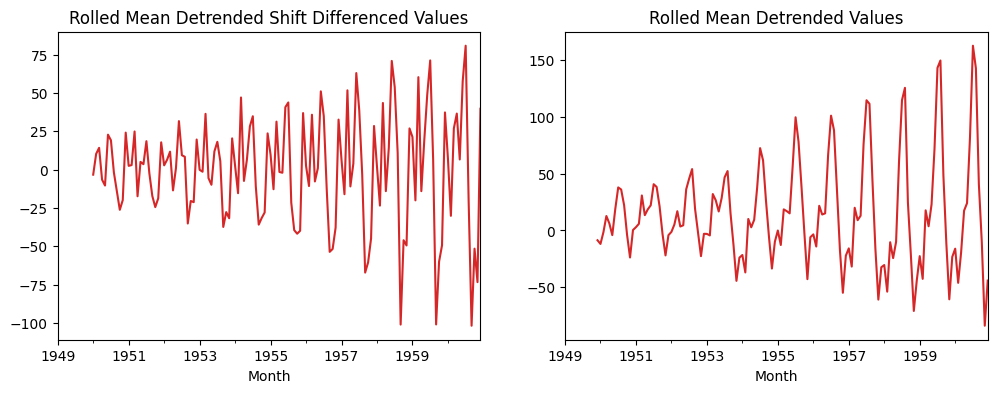

In [ ]:
# plot and calculate the rolled detrended diff
passengers_rolled_detrended_diff = passengers_rolled_detrended - passengers_rolled_detrended.shift()

# plot the logged_passengers_diff
ax1 = plt.subplot(121)
passengers_rolled_detrended_diff.plot(figsize=(12,4) ,color="tab:red", title="Rolled Mean Detrended Shift Differenced Values", ax=ax1);
ax2 = plt.subplot(122)
passengers_rolled_detrended.plot(color="tab:red", title="Rolled Mean Detrended Values", ax=ax2);

We can now test whether our time-series is stationary of now by applying the dicky-fuller test which we had applied above.

In [ ]:
# perform the ADF test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(passengers_rolled_detrended_diff.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.1544826348635753
2. P-Value :  0.022775264967859258
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 119
5. Critical Values :
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057


From our dicky-fuller test results, we can confirm that time-series is STATIONARY due to a p-value of 0.02 less than 0.05.

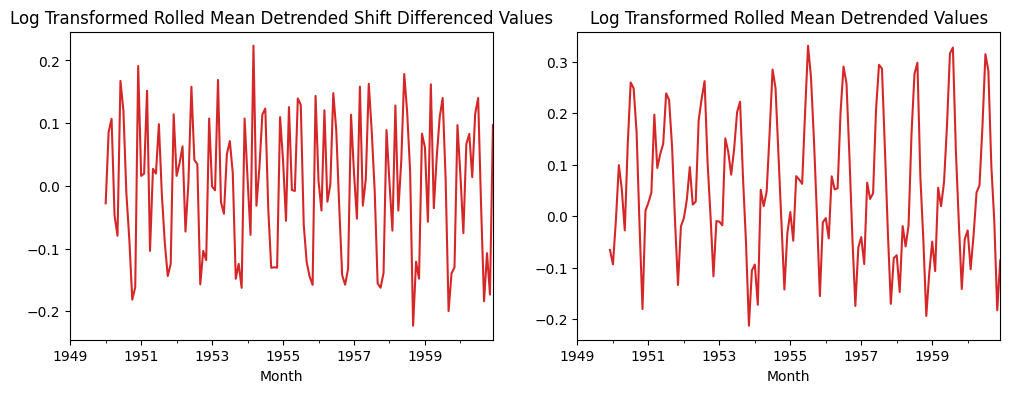

In [ ]:
# diffrence the log rolled detrended diff and plot
passengers_log_rolled_detrended_diff = passengers_log_rolled_detrended - passengers_log_rolled_detrended.shift()

# plot the logged_passengers_diff
ax1 = plt.subplot(121)
passengers_log_rolled_detrended_diff.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Rolled Mean Detrended Shift Differenced Values", ax=ax1);
ax2 = plt.subplot(122)
passengers_log_rolled_detrended.plot(color="tab:red", title="Log Transformed Rolled Mean Detrended Values", ax=ax2);

We can now test whether our time-series is stationary of now by applying the dicky-fuller test which we had applied above.

In [ ]:
# perform the ADF test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(passengers_log_rolled_detrended_diff.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.9129812454195174
2. P-Value :  0.0019413623769364548
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 118
5. Critical Values :
	 1% :  -3.4870216863700767
	 5% :  -2.8863625166643136
	 10% :  -2.580009026141913


From our dicky-fuller test results, we can confirm that time-series is STATIONARY due to a p-value of 0.001 less than 0.05.

**Differencing Over Power Transformed & Mean Rolled Time-Series**

We have applied differencing to power transformed & mean rolled time-series by shifting its value by 1 period and subtracting it from original time-series

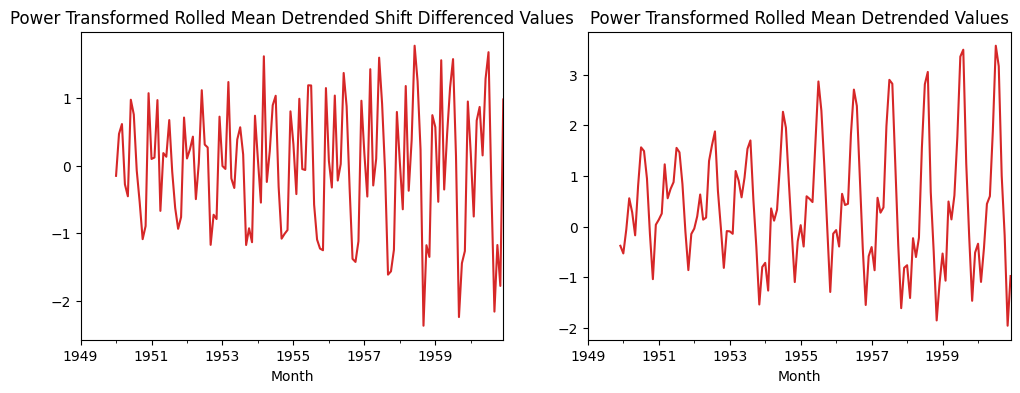

In [ ]:
# diffrence the power rolled detrended diff and plot
passengers_pow_rolled_detrended_diff = passengers_pow_rolled_detrended - passengers_pow_rolled_detrended.shift()

# plot the power_passengers_diff
ax1 = plt.subplot(121)
passengers_pow_rolled_detrended_diff.plot(figsize=(12,4) ,color="tab:red", title="Power Transformed Rolled Mean Detrended Shift Differenced Values", ax=ax1);
ax2 = plt.subplot(122)
passengers_pow_rolled_detrended.plot(color="tab:red", title="Power Transformed Rolled Mean Detrended Values", ax=ax2);

We can now test whether our time-series is stationary of now by applying the dicky-fuller test which we had applied above.

In [ ]:
# perform the ADF test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(passengers_pow_rolled_detrended_diff.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.622485336190725
2. P-Value :  0.005345423958262613
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 118
5. Critical Values :
	 1% :  -3.4870216863700767
	 5% :  -2.8863625166643136
	 10% :  -2.580009026141913


From our dicky-fuller test results, we can confirm that time-series is STATIONARY due to a p-value of 0.005 less than 0.05.

**Differencing Over Linear Regression Transformed Time-Series**

We have applied differencing to linear regression transformed time-series by shifting it's value by 1 period and subtracting it from original log-transformed time-series

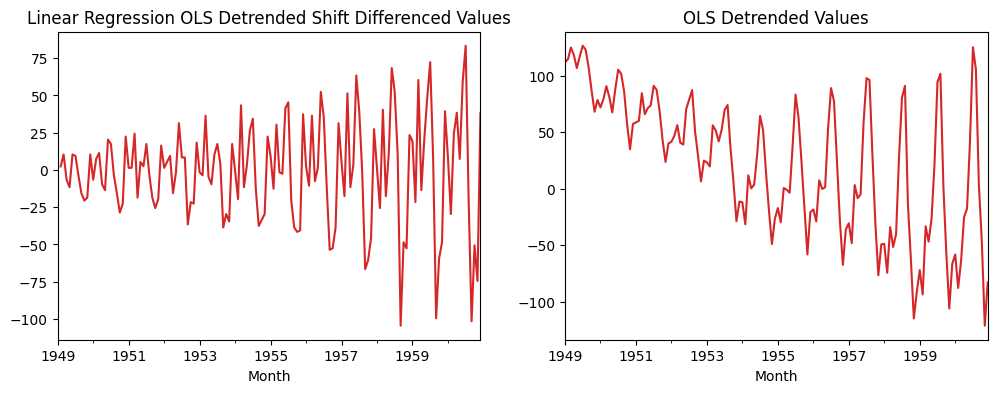

In [ ]:
# take the differrence of linear regressed transformed with a shift and then plot
passengers_ols_detrended_diff = passengers_ols_detrended - passengers_ols_detrended.shift()

# plot the power_passengers_diff
ax1 = plt.subplot(121)
passengers_ols_detrended_diff.plot(figsize=(12,4) ,color="tab:red", title="Linear Regression OLS Detrended Shift Differenced Values", ax=ax1);
ax2 = plt.subplot(122)
passengers_ols_detrended.plot(color="tab:red", title="OLS Detrended Values", ax=ax2);

We can now test whether our time-series is stationary of now by applying the dicky-fuller test which we had applied above

In [ ]:
# perform ADF test
# perform the ADF test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(passengers_ols_detrended_diff.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.8292668241700043
2. P-Value :  0.05421329028382486
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


From our dicky-fuller test results, we can confirm that time-series is NOT STATIONARY due to the p-value of 0.054 greater than 0.05.

This is the end!!!!